In [1]:
import numpy as np
from scipy import signal
%matplotlib inline
import matplotlib.pyplot as plt

## State Space Model

Linear Time Invariant (LTI) state space models are a linear representation of a dynamic system in either discrete or continuous time.    
Below is the continuous time form of a model in state space form 

\begin{equation*}
\begin{gathered}
  \dot x = Ax + Bu  \\
  y = Cx + Du  \\ 
\end{gathered} 
\end{equation*}

### 1. First Order System in State Space
\begin{equation*}
\begin{array}{*{20}{l}}
  {3\frac{{dx}}{{dt}} + 12x = 6u} \\ 
  {y = x} 
\end{array} \Rightarrow \begin{array}{*{20}{l}}
  {\dot x =  - 4x + 2u} \\ 
  {y = x} 
\end{array}
\end{equation*}

In [2]:
A = -4.0
B = 2.0
C = 1.0
D = 0.0

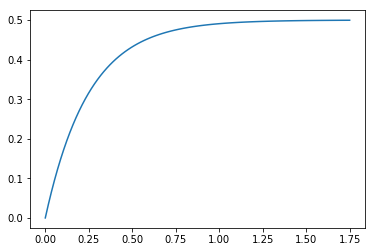

In [3]:
sys1 = signal.StateSpace(A,B,C,D)
t1, y1 = signal.step(sys1)
plt.plot(t1, y1)

### 2. Second Order System in State Space
\begin{equation*}
\begin{array}{*{20}{l}}
  {2\frac{{d{x_1}}}{{dt}} + 6{x_1} = 8u} \\ 
  {3\frac{{d{x_2}}}{{dt}} + 6{x_1} + 9{x_2} = 0} \\ 
  {y = \frac{{{x_1} + {x_2}}}{2}} 
\end{array} \Rightarrow \begin{array}{*{20}{l}}
  {\left[ {\begin{array}{*{20}{c}}
  {{{\dot x}_1}} \\ 
  {{{\dot x}_2}} 
\end{array}} \right] = \left[ {\begin{array}{*{20}{c}}
  { - 3}&0 \\ 
  { - 2}&{ - 3} 
\end{array}} \right]\left[ {\begin{array}{*{20}{c}}
  {{x_1}} \\ 
  {{x_2}} 
\end{array}} \right] + \left[ {\begin{array}{*{20}{c}}
  4 \\ 
  0 
\end{array}} \right]u} \\ 
  {y = \left[ {\begin{array}{*{20}{c}}
  {\frac{1}{2}}&{\frac{1}{2}} 
\end{array}} \right]\left[ {\begin{array}{*{20}{c}}
  {{x_1}} \\ 
  {{x_2}} 
\end{array}} \right]} 
\end{array}
\end{equation*}

In [4]:
A = [[-3.0,0.0],[-2.0,-3.0]]
B = [[4.0],[0.0]]
C = [0.5, 0.5]
D = [0.0]

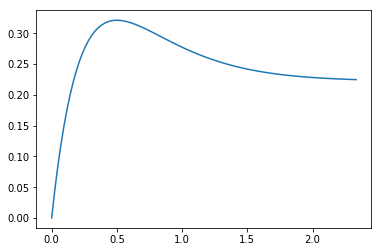

In [5]:
sys2 = signal.StateSpace(A,B,C,D)
t2, y2 = signal.step(sys2)
plt.plot(t2, y2)

### 3. Second order differential equation
\begin{equation*}
4\frac{{{d^2}y}}{{d{t^2}}} + 2\frac{{dy}}{{dt}} + y = 3u \Rightarrow \begin{array}{*{20}{l}}
  {{x_1} = y} \\ 
  {{x_2} = \frac{{dy}}{{dt}} = \frac{{d{x_1}}}{{dt}}} \\ 
  {\frac{{d{x_2}}}{{dt}} = \frac{{{d^2}y}}{{d{t^2}}}} 
\end{array} \Rightarrow 4{{\dot x}_2} + 2{x_2} + {x_1} = 3u \Rightarrow \begin{array}{*{20}{l}}
  {\left[ {\begin{array}{*{20}{c}}
  {{{\dot x}_1}} \\ 
  {{{\dot x}_2}} 
\end{array}} \right] = \left[ {\begin{array}{*{20}{c}}
  0&1 \\ 
  { - 0.25}&{ - 0.5} 
\end{array}} \right]\left[ {\begin{array}{*{20}{c}}
  {{x_1}} \\ 
  {{x_2}} 
\end{array}} \right] + \left[ {\begin{array}{*{20}{c}}
  0 \\ 
  {0.75} 
\end{array}} \right]u} \\ 
  {y = \left[ {\begin{array}{*{20}{c}}
  1&0 
\end{array}} \right]\left[ {\begin{array}{*{20}{c}}
  {{x_1}} \\ 
  {{x_2}} 
\end{array}} \right]} 
\end{array}
\end{equation*}

In [6]:
A = [[0.0,1.0],[-0.25,-0.5]]
print(np.linalg.eig(A)[0])
B = [[0.0],[0.75]]
C = [1.0, 0.0]
D = [0.0]

[-0.25+0.4330127j -0.25-0.4330127j]


### Stability
The linear state space model is stable if all eigenvalues of A are negative real numbers or have negative real parts to complex number eigenvalues. 
* If all real parts of the eigenvalues are negative then the system is stable, meaning that any initial condition converges exponentially to a stable attracting point. 
* If any real parts are zero then the system will not converge to a point 
* If the eigenvalues are positive the system is unstable and will exponentially diverge.

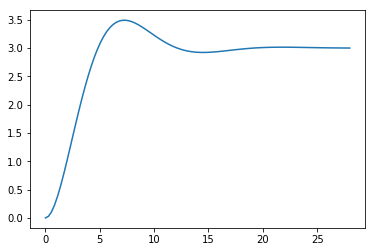

In [7]:
sys3 = signal.StateSpace(A,B,C,D)
t3, y3 = signal.step(sys3)
plt.plot(t3, y3)

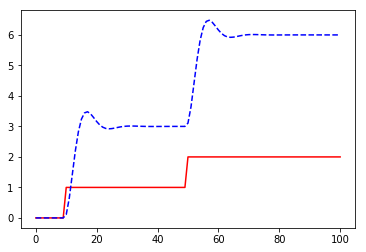

In [8]:
sys3 = signal.StateSpace(A,B,C,D)
t = np.linspace(0,100,101)
u = np.zeros(len(t))
u[10:50] = 1.0
u[50:] = 2.0
t3, y3, x3 = signal.lsim(sys3, u, t)

plt.plot(t, u, 'r-')
plt.plot(t3, y3, 'b--')

### 4. Nonliear differential equations
\begin{equation*}
\begin{gathered}
  \frac{{dx}}{{dt}} = f\left( {x,u} \right) \hfill \\
  y = g\left( x \right) \hfill \\ 
\end{gathered}
\end{equation*}

The expressions for $f\left( {x,u} \right)$ and $g\left( x \right)$ are **linearized by a Taylor series expansion**, using only the first two terms      
\begin{equation*}
\frac{dx}{dt} = f(x,u) \approx f \left(\bar x, \bar u\right) + \frac{\partial f}{\partial x}\bigg|_{\bar x,\bar u} \left(x-\bar x\right) + \frac{\partial f}{\partial u}\bigg|_{\bar x,\bar u} \left(u-\bar u\right)
\end{equation*}       
If the values of ${\bar u}$ and ${\bar x}$ are chosen at steady state conditions then $f\left( {\bar x,\bar u} \right) = 0$ because the derivative term $\frac{{dx}}{{dt}} = 0$ at steady state.       
To simplify the final linearized expression, deviation variables are defined as $y' = y - \bar y$, $x' = x - \bar x$ and $u' = u - \bar u$.          
A deviation variable is a change from the nominal steady state conditions. The derivatives of the deviation variable are defined as $\frac{{dx'}}{{dt}} = \frac{{dx}}{{dt}}$ because $\frac{{d\bar u}}{{dt}} = 0$ in $\frac{{dx'}}{{dt}} = \frac{{d\left( {x - \bar x} \right)}}{{dt}} = \frac{{dx}}{{dt}} - \frac{{d\bar x}}{{dt}} = \frac{{dx}}{{dt}} - 0 = \frac{{dx}}{{dt}}$.             
If there are additional variables such as a disturbance variable $d$ then it is added as another input term in deviation variable form.

\begin{equation*}
\begin{gathered}
  \frac{dx'}{dt} = \alpha \, y' + \beta \, u' \hfill \\
  y' = \gamma \, x' \hfill \\ 
\end{gathered}
\end{equation*} 

The values of the constants $\alpha$ and $\beta$ are the partial derivatives of $f\left( {x,u} \right)$ and the value of the constant $\gamma$ is the partial derivative of $g\left( x \right)$, all evaluated as steady state conditions.     
\begin{equation*}
\alpha = \frac{\partial f}{\partial x}\bigg|_{\bar x,\bar u} \quad \quad \beta = \frac{\partial f}{\partial u}\bigg|_{\bar x,\bar u} \quad \quad \gamma = \frac{\partial g}{\partial x}\bigg|_{\bar x}
\end{equation*}       
In cases with more than one $u$, $x$, or $y$ the general form of the linearized model in state space form with three inputs, two states, and two outputs is  
\begin{equation*}
\begin{bmatrix}\dot x_1'\\\dot x_2'\end{bmatrix} = \begin{bmatrix}\frac{\partial f_1}{\partial x_1}\bigg|_{\bar x,\bar u}&\frac{\partial f_1}{\partial x_2}\bigg|_{\bar x,\bar u}\\\frac{\partial f_2}{\partial x_1}\bigg|_{\bar x,\bar u}&\frac{\partial f_2}{\partial x_2}\bigg|_{\bar x,\bar u}\end{bmatrix} \begin{bmatrix}x_1'\\x_2'\end{bmatrix} + \begin{bmatrix}\frac{\partial f_1}{\partial u_1}\bigg|_{\bar x,\bar u}&\frac{\partial f_1}{\partial u_2}\bigg|_{\bar x,\bar u}&\frac{\partial f_1}{\partial u_3}\bigg|_{\bar x,\bar u}\\\frac{\partial f_2}{\partial u_1}\bigg|_{\bar x,\bar u}&\frac{\partial f_2}{\partial u_2}\bigg|_{\bar x,\bar u}&\frac{\partial f_2}{\partial u_3}\bigg|_{\bar x,\bar u} \end{bmatrix} \begin{bmatrix}u_1'\\u_2'\\u_3'\end{bmatrix}
\end{equation*}  
\begin{equation*}
\begin{bmatrix}y_1'\\y_2'\end{bmatrix} = \begin{bmatrix} \frac{\partial g_1}{\partial x_2}\bigg|_{\bar x}&\frac{\partial g_1}{\partial x_2}\bigg|_{\bar x}\\\frac{\partial g_2}{\partial x_2}\bigg|_{\bar x}&\frac{\partial g_2}{\partial x_2}\bigg|_{\bar x}\end{bmatrix} \begin{bmatrix}x_1'\\x_2'\end{bmatrix}
\end{equation*}

Example:     
\begin{equation*}
\begin{gathered}
  2 \frac{dx_1}{dt} + x_1^2 + 3 \, x_2^2 = 16 \, u \hfill \\
  3 \frac{dx_2}{dt} + 6 \, x_1^2 + 6 \, x_2^2 = 0 \hfill \\ 
  y_1 = x_2 \hfill \\
  y_2 = x_1 \hfill \\
  \bar u = 1, \quad \bar x = \begin{bmatrix}2\\2\end{bmatrix} \hfill \\
\end{gathered}
\end{equation*}       
Linearization:       
\begin{equation*}      
\begin{gathered}
  \frac{{d{x_1}}}{{dt}} = {f_1}\left( {x,u} \right) =  - 0.5x_1^2 - 1.5x_2^2 + 8u \Rightarrow {\left. {\frac{{\partial {f_1}}}{{\partial {x_1}}}} \right|_{\bar x,\bar u}} =  - {x_1} =  - 2,{\left. {\frac{{\partial {f_1}}}{{\partial {x_2}}}} \right|_{\bar x,\bar u}} =  - 3{x_2} =  - 6 \hfill \\
  \frac{{d{x_2}}}{{dt}} = {f_2}\left( {x,u} \right) =  - 2x_1^2 - 2x_2^2 \Rightarrow {\left. {\frac{{\partial {f_2}}}{{\partial {x_1}}}} \right|_{\bar x,\bar u}} =  - 4{x_1} =  - 8,{\left. {\frac{{\partial {f_2}}}{{\partial {x_2}}}} \right|_{\bar x,\bar u}} =  - 4{x_2} \hfill \\ 
\end{gathered} 
\end{equation*}     
Then      
\begin{equation*} 
\begin{gathered}
  \left[ {\begin{array}{*{20}{c}}
  {{{\dot x}_1}} \\ 
  {{{\dot x}_2}} 
\end{array}} \right] = \left[ {\begin{array}{*{20}{c}}
  { - 2}&{ - 6} \\ 
  { - 8}&{ - 8} 
\end{array}} \right]\left[ {\begin{array}{*{20}{c}}
  {{x_1}} \\ 
  {{x_2}} 
\end{array}} \right] + \left[ {\begin{array}{*{20}{c}}
  8 \\ 
  0 
\end{array}} \right]u \hfill \\
  y = \left[ {\begin{array}{*{20}{c}}
  0&1 \\ 
  1&0 
\end{array}} \right]\left[ {\begin{array}{*{20}{c}}
  {{x_1}} \\ 
  {{x_2}} 
\end{array}} \right] \hfill \\ 
\end{gathered} 
\end{equation*}   

In [9]:
A = [[-2.0,-6.0],[-8.0,-8.0]]
print(np.linalg.eig(A)[0])
B = [[8.0],[0.0]]
C = [[0.0,1.0],[1.0,0.0]]
D = [[0.0],[0.0]]

[  2.54983444 -12.54983444]


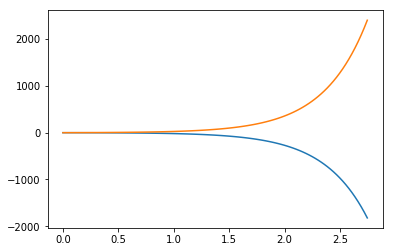

In [10]:
sys4 = signal.StateSpace(A,B,C,D)
t4, y4 = signal.step(sys4)
plt.plot(t4, y4)